## 다차원 배열의 계산

※ 행렬의 형상에 주의 ※
- 행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 수(행 수)가 같아야 함.
- Example : 2 x 3 행렬과 2 x 2 행렬은 곱할 수 없음.

In [4]:
# 1차원 배열
import numpy as np
A = np.array([1, 2, 3, 4])
print("A : ", A)
print("A ndim : ", np.ndim(A))
print("A Shape : ", A.shape)    # 다차원 배열일 때와 통일된 형태로 반환하기에 1차원 배열도 튜플로 반환이 됨
print("A[0] Shape : ", A.shape[0])

A :  [1 2 3 4]
A ndim :  1
A Shape :  (4,)
A[0] Shape :  4


In [5]:
# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print("B : ", B)
print("B ndim : ", np.ndim(B))
print("B Shape : ", B.shape)

B :  [[1 2]
 [3 4]
 [5 6]]
B ndim :  2
B Shape :  (3, 2)


## 행렬의 곱

2x2 행렬의 곱 계산 방법

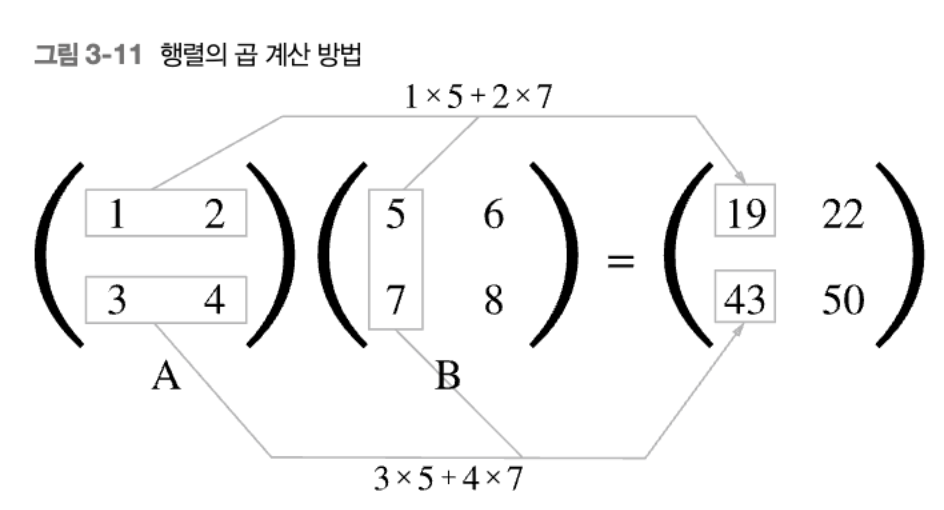

- 왼쪽의 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산 -> 그 계산 값이 새로운 다차원 배열의 원소가 됨.

In [6]:
A = np.array([[1, 2], [3, 4]])
print("A Shape : ", A.shape)

B = np.array([[5, 6], [7, 8]])
print("B Shape : ", B.shape)

answer = np.dot(A,  B)
print("A X B : ", answer)

A Shape :  (2, 2)
B Shape :  (2, 2)
A X B :  [[19 22]
 [43 50]]


In [7]:
# 형상이 다른 행렬의 곱1
A = np.array([[1, 2, 3], [4, 5, 6]])
print("A Shape : ", A.shape)

B = np.array([[1, 2], [3, 4], [5, 6]])
print("B Shape : ", B.shape)

answer = np.dot(A, B)
print("A X B : ", answer)

A Shape :  (2, 3)
B Shape :  (3, 2)
A X B :  [[22 28]
 [49 64]]


In [8]:
# 형상이 다른 행렬의 곱2
A = np.array([[1, 2], [3, 4], [5, 6]])
print("A Shape : ", A.shape)

B = np.array([7, 8])
print("B Shape : ", B.shape)

answer = np.dot(A, B)
print("A X B : ", answer)

A Shape :  (3, 2)
B Shape :  (2,)
A X B :  [23 53 83]


## 신경망에서의 행렬 곱
※ 해당 신경망은 편향(b)과 활성화 함수를 생략하고 가중치(w)만 갖는다 ※

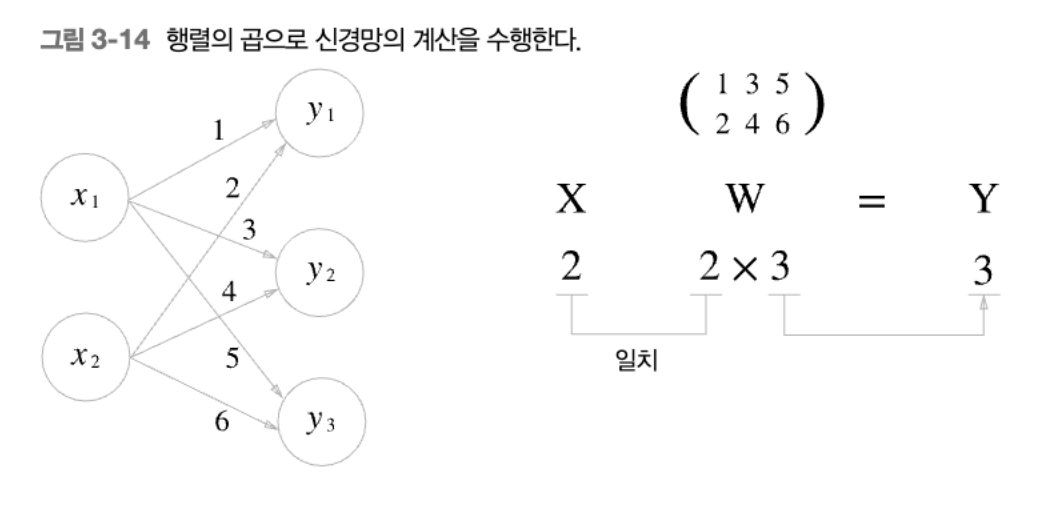

In [9]:
X = np.array([1, 2])
print("X Shape : ", X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print("W : ", W)
print("W Shape : ", W.shape)

Y = np.dot(X, W)
print("X x W : ", Y)

X Shape :  (2,)
W :  [[1 3 5]
 [2 4 6]]
W Shape :  (2, 3)
X x W :  [ 5 11 17]


## 3층 신경망 구현하기
### 아래 그림의 3층 신경망에서 수행되는 입력부터 출력까지의 처리(순방향 처리)를 구현

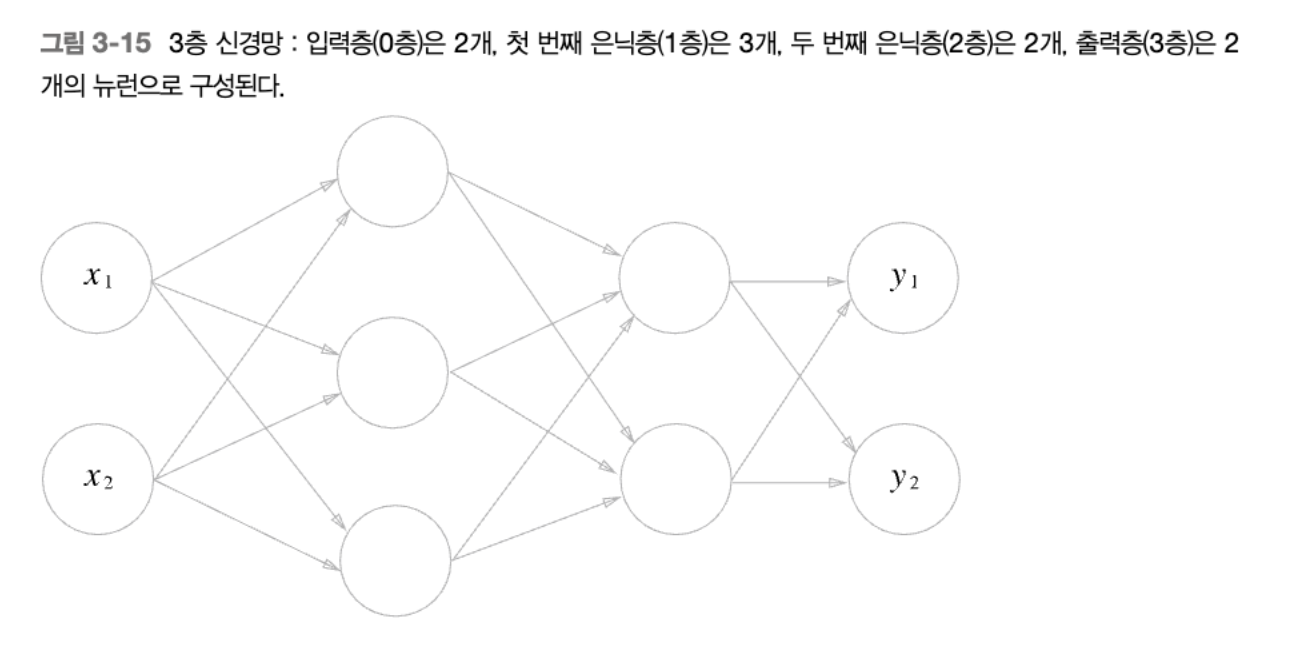

In [10]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print("W1 Shape : ", W1.shape)
print("X Shape : ", X.shape)
print("B1 Shape : ", B1.shape)

# (원소 * 가중치) + 편향
A1 = np.dot(X, W1) + B1
print(A1)

W1 Shape :  (2, 3)
X Shape :  (2,)
B1 Shape :  (3,)
[0.3 0.7 1.1]


### 1층의 활성화 함수에서의 처리
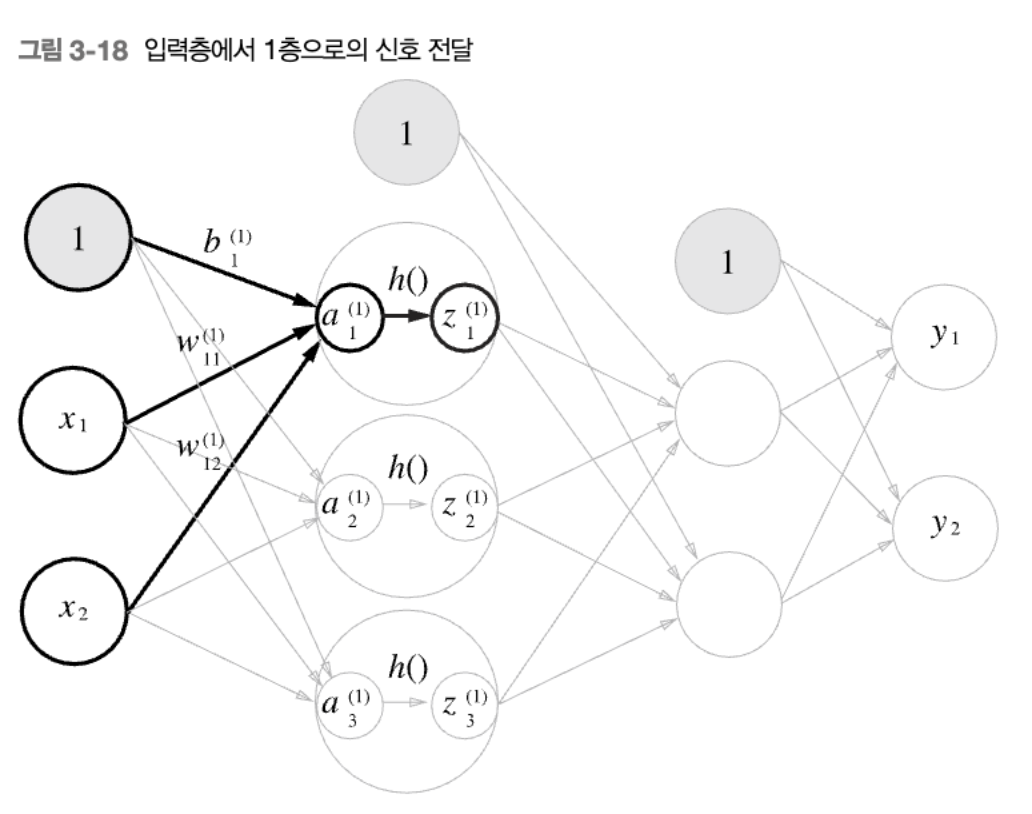

위 이미지는 은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기한다.

활성화 함수로 sigmoid 함수 사용

In [11]:
# 시그모이드 함수 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)
print("A1 : ", A1)
print("Z1 : ", Z1)

A1 :  [0.3 0.7 1.1]
Z1 :  [0.57444252 0.66818777 0.75026011]


### 1층에서 2층으로의 신호 전달

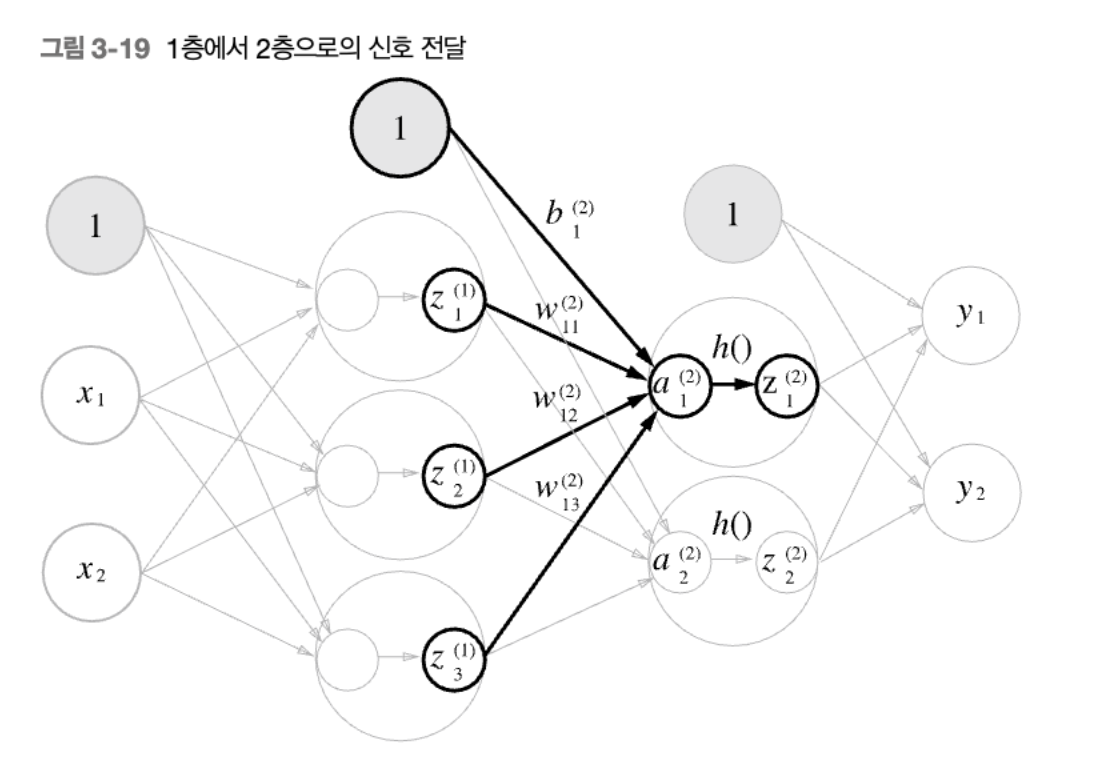

In [12]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print("Z1 Shape : ", Z1.shape)
print("W2 Shape : ", W2.shape)
print("B2 Shape : ", B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

Z1 Shape :  (3,)
W2 Shape :  (3, 2)
B2 Shape :  (2,)
[0.62624937 0.7710107 ]


### 2층에서 출력층으로의 신호 전달

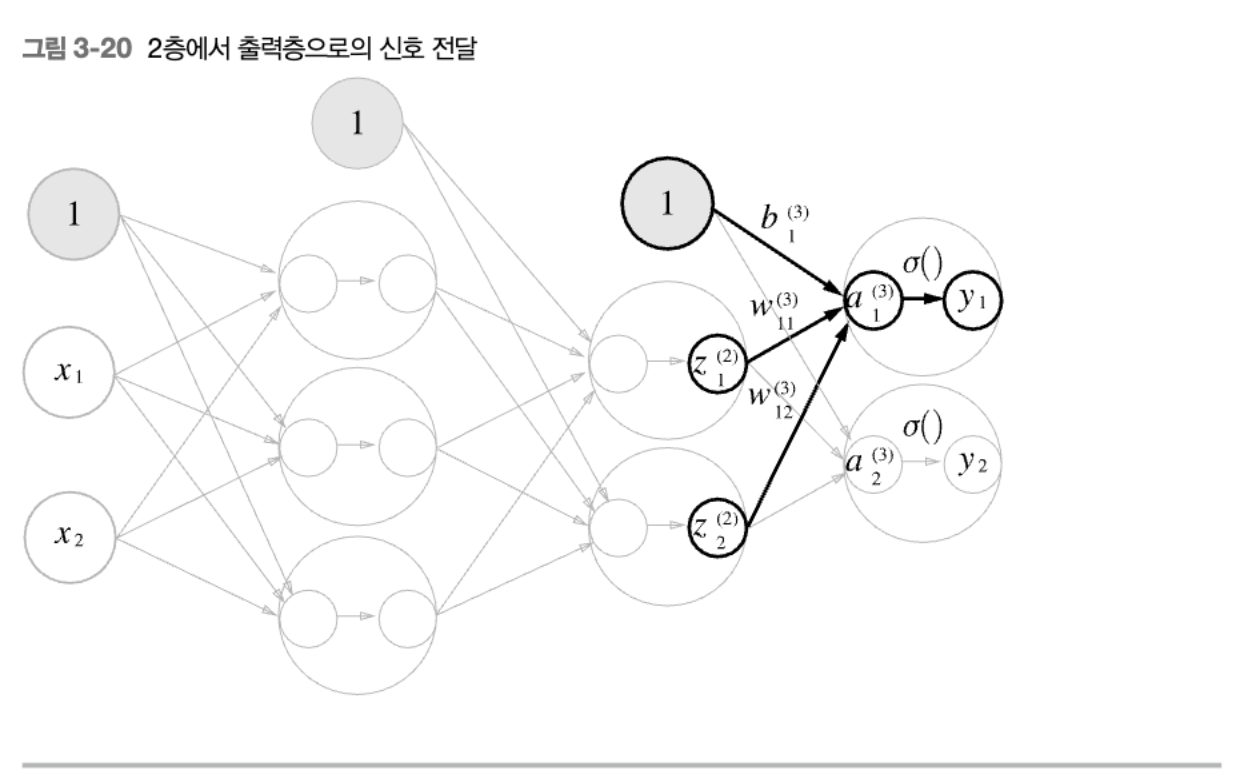

In [14]:
import numpy as np 

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)   # 또는 Y = A3
print(Y)

[0.31682708 0.69627909]


### 구현 정리 (지금까지의 구현을 정리)
가중치 : 대문자 (W1)

편향과 중간 결과 : 소문자

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
